# Пример 2. Визуализация

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from numpy.random import normal as ND
import numpy as np

import matplotlib.pyplot as plt
from IPython.display import display, clear_output

## Подготовка данных

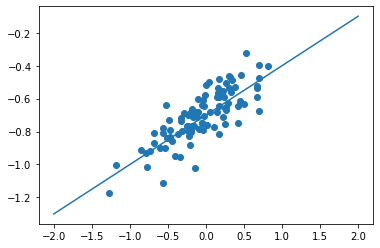

In [13]:
a = 0.3
b = -0.7
x_data = [ND(0,0.4) for _ in range(100)]
y_data = [a*x+b+ND(0,0.1) for x in x_data]
x_init = np.linspace(-2,2)
y_init = [a*x+b for x in x_init]

plt.plot(x_init, y_init)
plt.scatter(x_data, y_data)

## Создание модели

In [18]:
def model_builder():
    model = keras.Sequential([
        layers.Dense(1, input_shape = (1,))
    ])
    
    optimizer = keras.optimizers.SGD()
    
    model.compile(loss = 'mse',
                  optimizer = optimizer)
    return model

In [19]:
model = model_builder()
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


## Обучение

In [20]:
model = model_builder()
EPOCHS = 1000

class CustomCB(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 10 == 0:
            clear_output(wait = True)
            display(fig)
            plt.pause(0.5)
            print("loss =", logs['loss'])
            ax1.plot(x_init, model.predict(x_init), label = "epoch #%d" % epoch)
            ax2.scatter(epoch, logs['loss'], label = "epoch #%d" % epoch)
            if logs['loss'] < 0.015:
                print("Stop training")
                self.model.stop_training = True

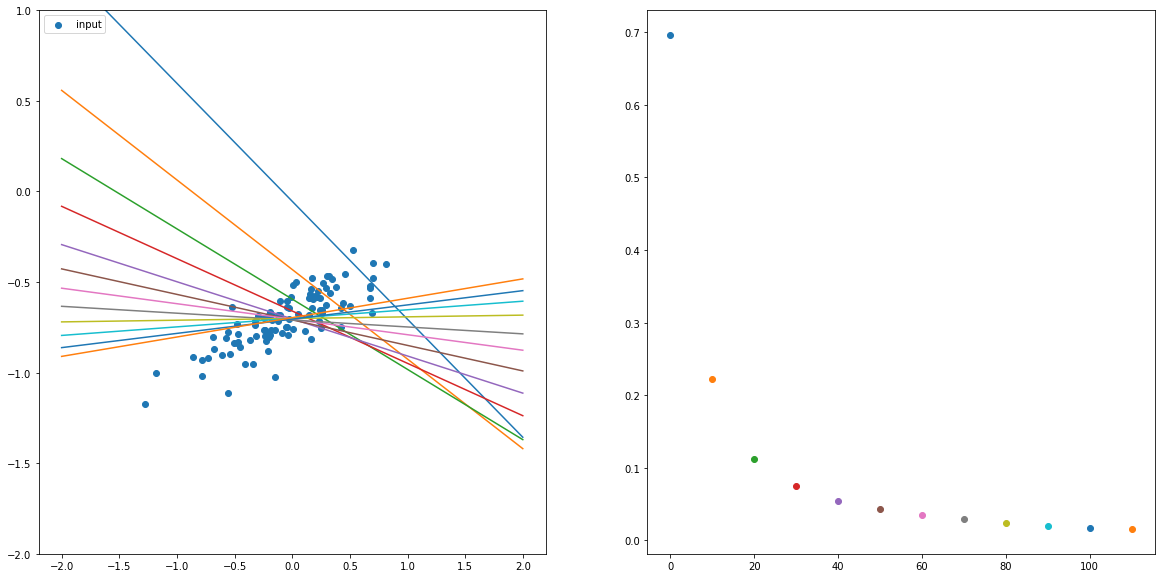

loss = 0.013986032456159592
Stop training


In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,10))

ax1.scatter(x_data, y_data, label = 'input')
ax1.set_ylim(-2,1)
ax1.legend(loc='upper left')
display(fig)
clear_output(wait = True)
plt.pause(0.5)
history = model.fit(
  x_data, y_data,
  epochs=EPOCHS, verbose=0,
  callbacks=[CustomCB()])